In [2]:
%matplotlib inline
import numpy as np;
import matplotlib
import matplotlib.pyplot as plt

# import demos
from code.l12_newton import *;

$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\grad}{\nabla}
\newcommand{\eps}{\varepsilon}
$

<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# L12: Fixed Points & Newton's Method

*Tuesday, September 25, 2018*

# Fixed Points

### Problem:  Brouwer Teaser

<div style="padding:10px;margin:10px;border:1px solid black">
<b>Problem:</b>  Show that every continuous function $f : [a,b] \rightarrow [a,b]$ has a fixed point $c \in [a,b]$ such that $f(c)=c$.
</div>

### Brouwer's Fixed Point Theorem

Let $B_n := \{ x \in \R^n : \|x\|_2 \leq 1 \}$ be the 2-norm ball in $n$ dimensions.

**Theorem**: Let $f$ be any continuous function $f : B_n \to B_n$. Then there exists a point $x \in B_n$ such that $f(x) = x$.

# Newton's Method

### Recall:  Root-Finding

### Recall:  Bisection Method

<img src="images/bisection_method.png">

### Recall:  Bisection Method

<img src="images/bisection_method_plot.png">

### Recall:  One-Dimensional Newton's Method

Newton's method for finding zeros of differentiable $f: \R \rightarrow \R$ is

<div style="border:1px solid black; padding:20px; margin:20px">
$$
\begin{align}
x_0 &= \text{initial guess} \\
x_{t+1} &= x_t - \frac{f(x_t)}{f'(x_t)}
\end{align}
$$
</div>

### Interpretation:  Newton's Method

![](images/l11-newton-roots.png)

### Demo:  Newton's Method

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
Iteration Process,6.500,5.000,4.000,3.333,2.889,2.593,2.395,2.263,2.176,2.117


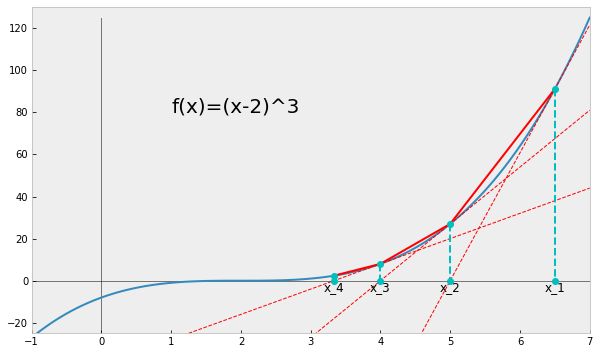

In [41]:
def fn(x): 
    return (x-2)**3; 
def d1(x): 
    return 3*(x-2)**2; 
newton_example(fn,d1)

### Problem:  Gradient Descent vs. Newton

Below, let $f : \R \rightarrow \R$.  Suppose our current guess at a minimizer is $x_t \in \R$.

<div style="border:1px solid black; padding:20px; margin:20px">
<b>Part A</b>  Gradient descent chooses $x_{t+1} = x_t - \eta f'(x_t)$.  Show that
    $$
    x_{t+1} = \arg\min_{x} f(x_t) + f'(x_t)(x-x_t) + \tfrac{\eta}{2} (x-x_t)^2
    $$
</div>

### Problem:  Newton's Method for Optimization

Suppose we want to minimize a function $f : \R \rightarrow \R$.  

* Candidates for local minima are the **critical points** $x \in \R$ such that $f'(x) = 0$
* If $f$ is convex, the critical point is the global minimum.
* Otherwise, still need to check whether we're at a minimum, maximum, or saddle point.

<div style="border:1px solid black; padding:20px; margin:20px">
<b>Problem:</b>  Use Newton's method to derive an algorithm for finding critical points of a function $f : \R \rightarrow \R$.
<ul>
    <li>Which assumptions do you need to make about $f$?</li>
</ul>
</div>

### Solution:  Newton's Method for Optimization

1. For $f : \R \rightarrow \R$, we want to find zeros of $f' : \R \rightarrow \R$.
2. Applying Newton's root-finding method from an initial guess $x_0 \in \R$,
    $$
    x_{t+1} = x_t - \frac{f'(x_t)}{f''(x_t)}
    $$
3. This requires that $f$ is twice differentiable and $f''(x_t) \neq 0$.

### Problem:  Multivariate Newton for Optimization

Now, suppose we want to minimize the multivariate function $f : \R^n \rightarrow \R$.

* The derivative evaluated at any $x \in \R^n$ is a linear transformation $\nabla_x f : \R^n \rightarrow \R$
    * Can be represented by a row vector.
* At a critical point, the function $\nabla_x f$ should map every input to zero.
    * i.e. at a critical point $\nabla_x f$ is represented by the zero vector.
    
<div style="border:1px solid black; padding:20px; margin:20px">
<b>Problem:</b>  Derive a multivariable version of Newton's method for finding critical points of $f : \R^n \rightarrow \R$.
<ul>
    <li>(Use the linear approximation interpretation of Newton's root-finding method.)</li>
    <li>What assumptions are needed about the function $f$ for this method to work?</li>
</ul>
</div>

### Solution:  Multivariate Newton for Optimization

Essentially, we want to find zeros of the map $\varphi : \R^n \rightarrow \R^n$ mapping $x \mapsto \nabla_x f$.  The linear approximation to $\varphi$ at a point $x_t \in \R^n$ is
$$
\psi(y) = \varphi(x_t) + (\nabla_{x_t} \varphi) (y-x_t)
$$

Since $\varphi : \R^n \rightarrow \R^n$, its derivative $\varphi \in L(\R^n \rightarrow \R^n)$ can be represented by an $(n \times n)$ matrix.  Assume this matrix is invertible.  Choose $x_{t+1}$ to be a root of $\psi$,
$$
\begin{align}
\psi(x_{t+1}) = 0 &\implies (\nabla_{x_t} \varphi) (x_{t+1}-x_t) = -\varphi(x_t) \\
&\implies x_{t+1} - x_t = - (\nabla_{x_t} \varphi)^{-1} \varphi(x_t) \\
\end{align}
$$
Notice that $\nabla_{x_t} \varphi$ is the Hessian of $f$, and $\varphi(x_t)$ was defined to be the gradient.  Therefore, multivariate Newton's method for optimization has the form
$$
x_{t+1} = x_t - (\nabla^2_{x_t} f)^{-1} (\nabla_{x_t} f)
$$

### Remark:  Computing Inverses

Inverting large matrices, or even approximating the matrix inverse, is **expensive** unless the matrices involved have very special structure. 
* $O(n^3)$ for naive methods like Gaussian elimination
* $O(n^{2.373})$ if you're really clever

So, Newton's method isn't used much in practice, but it is the inspiration for many other methods.  Some related topics:
* Fast algorithms exist for computing **(inverse-)Hessian-vector products**
* Automatic differentiation
* Hessian-free optimization ([video](https://www.youtube.com/watch?v=iJ67SnPHEnU) and [paper](http://www.cs.toronto.edu/~jmartens/docs/Deep_HessianFree.pdf))
* LBFGS, nonlinear conjugate gradient

### Remark:  Nonlinear Systems of Equations

Multivariate Newton's method is also a general root-finding method that can also be used to find solutions of nonlinear systems of equations:

$$
\begin{align}
f_1(x_1,\dots,x_n) &= 0 \\
f_2(x_1,\dots,x_n) &= 0 \\
\vdots & \\
f_m(x_1,\dots,x_n) &= 0
\end{align}
$$

When $m=n$, Newton's method is what you'd expect.  When $m \neq n$, i.e. the system is under- or over-determined, there are some subtleties.



### Problem:  Newton's Method for Quadratic

Let $A \in \R^{n \times n}$ be a symmetric non-singular PSD matrix, and let $b$ be an arbitrary vector. Let
$$f(x) = \frac 1 2 x^\top A x + b^\top x + c$$
Show that Newton's method converges in *a single iteration*!

### Problem: Newton's Method for Quadratic 2

Let $A \in \R^{n \times n}$ be a symmetric non-singular PSD matrix, and let $b$ be an arbitrary vector. Let
$$f(x) = \frac 1 2 x^\top A x + b^\top x + c$$
Under what conditions for $A$ is Newton's method a special case of gradient descent?

### Justification:  Conditioning

* Gradient descent has trouble when the level curves of the objective are ellipses.
* Newton's method stretches space to turn ellipses into circles!
* Derive Multivariate Newton for Optimization as a root-finding algorithm
* Show that Gradient Descent can be interpreted as minimizing a quadratic $\phi(y) = f(x) + \inner{\nabla f(x), y-x} + \norm{y-x}^2$
* Show Newton's method is affinely invariant
    * Should probably motivate this with a problem demonstrating that gradient descent is NOT affinely invariant
* Convergence analysis?
* Newton with step size?

Helpful resources:

* Boyd section 9.5
* https://www.math.ntnu.no/emner/TMA4123/2012v/notater/nr-systems-a4.pdf
* http://www.stat.cmu.edu/~ryantibs/convexopt-S15/lectures/14-newton.pdf
* https://www.cs.ccu.edu.tw/~wtchu/courses/2014s_OPT/Lectures/Chapter%209%20Newton's%20Method.pdf
* http://homes.sice.indiana.edu/classes/spring2012/csci/b553-hauserk/newtons_method.pdf
* http://web.mit.edu/18.06/www/Spring17/Multidimensional-Newton.pdf
* http://www.math.pitt.edu/~sussmanm/2070/lab_05/index.html
* http://www.ohiouniversityfaculty.com/youngt/IntNumMeth/lecture13.pdf


## Let's try it out!

We are going to use Newton's method to compute the minimizer of this function:
$$f(x) := \log \left( \sum_{i=1}^n \exp(x_i) \right) - v\cdot x$$
where $v$ is some arbitrary vector. Recall, you already proved this function is convex!

In [97]:
import numpy as np

# Note that here we are using the *pseudoinverse* of a matrix (see pinv below).
# Don't worry about what that is for now, we'll discuss this more later.
from numpy.linalg import pinv as matrix_inverse

LENGTH = 10

# Let's pick an arbitrary vector
vec = np.arange(1,LENGTH+1)
vec = vec/np.sum(vec)

# Here's a good arbitrary initial x
xinit = np.ones((LENGTH,))

# Here is the function
def func(x):
    logsumexp = np.log(np.sum(np.exp(x)))
    return logsumexp - vec.dot(x)

# Here is the gradient
def func_grad(x):
    expsum = np.exp(x)
    expsumnorm = expsum/sum(expsum)
    return expsumnorm - vec

def func_hess(x):
    expsum = np.exp(x)
    expsumnorm = expsum/np.sum(expsum)
    # Can you figure out what the hessian is? Hint: use 'expsumnorm',
    # and you might find the function np.outer(a,b) to be useful, which is
    # the outer produce of a and b
    return None


In [ ]:
x = xinit
print("init cost is %.9f" % func(x))
for i in range(10):
    # put some code here!
    # We gave you a function you can use: matrix_inverse()
    # Update the vector x:
    #   first do an interation of Newton's method
    # Then print out:
    print("on iteration %d, the value of f(x) is %.9f" % (i,func(x)))
    
# Now let's check to see how big our gradient is
print("The final gradient is: ")
print(func_grad(x))